In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df=pd.read_csv('train_news.csv')
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


# Data Description:

There are 6 columns in the dataset provided to you. The description of each of the column is given below:

“id”: Unique id of each news article

“headline”: It is the title of the news.

“news”: It contains the full text of the news article

“Unnamed:0”: It is a serial number

“written_by”: It represents the author of the news article

“label”: It tells whether the news is fake (1) or not fake (0).


In [3]:
# Dropping the Unnamed: 0 column which doesn't add any value to the dataset
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
# Looking for shape of the dataset
print('Shape of the dataset:',df.shape)

Shape of the dataset: (20800, 5)


In [5]:
# Looking for the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# Checking for null values in the dataset
df.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

###### Observations: There are some missing the null values in the dataset

In [7]:
# Dropping the null values
df = df.dropna()

In [8]:
df.reset_index(inplace=True)

In [9]:
df.head(15)

,index,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
6,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
7,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
8,10,11136,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1
9,11,2150,BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...,Iron Sheik,Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...,1


In [10]:
df.shape

(18285, 6)

###### Observations: The dataset containing 20800 rows has now reduced to 18285.

In [11]:
# Checking for the datatypes
df.dtypes

index          int64
id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

###### Observations: The columns headline,written_by,news are of object type and remaining columns are of int type

In [12]:
# Checking for count of unique values in each feature
for s in  df.columns:
    print(s,'==>',df[s].nunique())

index ==> 18285
id ==> 18285
headline ==> 17931
written_by ==> 3838
news ==> 18017
label ==> 2


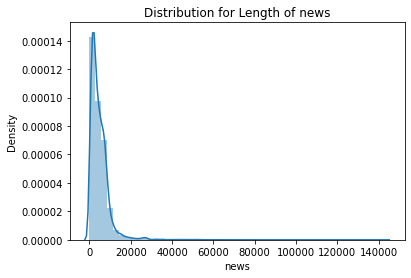

In [13]:
# Visualizing the Length of news
lens = df.news.str.len()
sns.distplot(lens)
plt.title("Distribution for Length of news")
plt.show()

In [14]:
# Checking the count of each label
df['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [15]:
print("Ratio of Notfake News :",round(len(df[df['label']==0])/len(df['label']),2)*100,'%')
print("Ratio of Fake News :",round(len(df[df['label']==1])/len(df['label']),2)*100,'%')

Ratio of Notfake News : 56.99999999999999 %
Ratio of Fake News : 43.0 %


<AxesSubplot:>

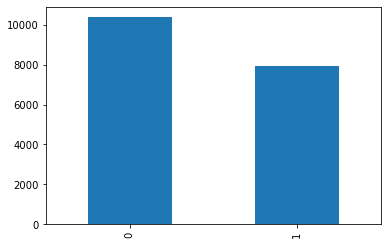

In [16]:
# Plotting the count of label using barplot
df['label'].value_counts().plot.bar()

In [17]:
# Adding a column(length) which indicates the length of news column
df['length'] = df['news'].str.len()
df.head(4)

,index,id,headline,written_by,news,label,length
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516


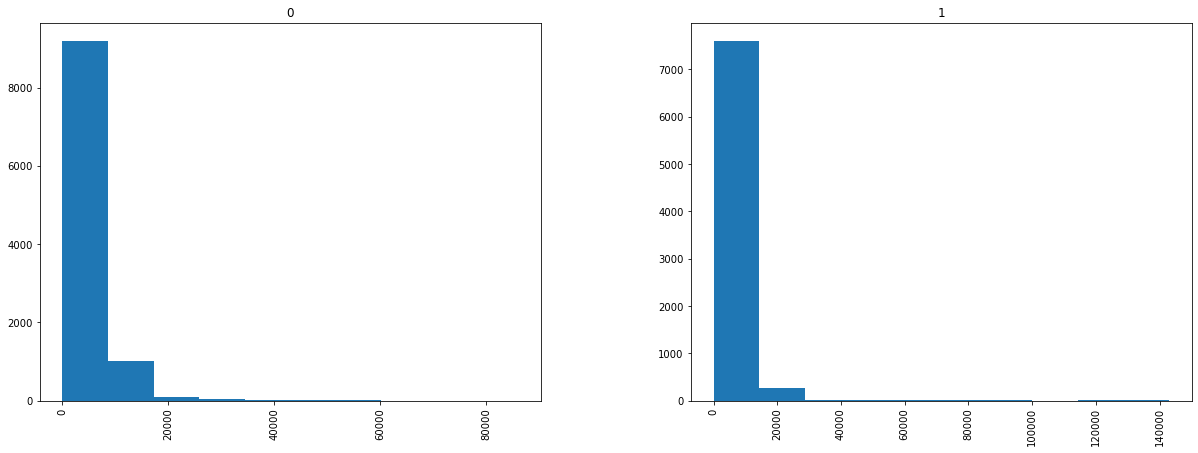

In [18]:
# Visualizing the length of each label
df.hist(column='length', by='label', bins=10, figsize=(20,7));

In [19]:
# News at index 2 is small. So,we check the preprocessing steps with it easily.
df['news'][2]

'Sunday on ABC’s “This Week,” while discussing the Republican plan to repeal and replace Obamacare Sen. Tom Cotton ( ) warned GOP House members “Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote. ”  He added, “The bill probably can be fixed, but it’s going to take a lot of carpentry on that framework. ” (  The Hill) Follow Pam Key on Twitter @pamkeyNEN'

# Building word dictionary

In [20]:
# Removing HTML tags
import re
def reg(text):
    clean = re.compile(r"<.*?>")
    return re.sub(clean," ",text)     # replacing Substring  with " "

df.news = df.news.apply(reg)
df.news[2]

'Sunday on ABC’s “This Week,” while discussing the Republican plan to repeal and replace Obamacare Sen. Tom Cotton ( ) warned GOP House members “Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote. ”  He added, “The bill probably can be fixed, but it’s going to take a lot of carpentry on that framework. ” (  The Hill) Follow Pam Key on Twitter @pamkeyNEN'

In [21]:
# Removing Special Characters
def special_char(text):
    Special_Characters = ''
    for i in text:
        if i.isalnum():
            Special_Characters = Special_Characters + i
        else:
            Special_Characters = Special_Characters + ' '
    return Special_Characters

In [22]:
df.news = df.news.apply(special_char)
df.news[2]

'Sunday on ABC s  This Week   while discussing the Republican plan to repeal and replace Obamacare Sen  Tom Cotton     warned GOP House members  Do not walk the plank and vote for a bill that cannot pass the Senate and then have to face the consequences of that vote     He added   The bill probably can be fixed  but it s going to take a lot of carpentry on that framework       The Hill  Follow Pam Key on Twitter  pamkeyNEN'

In [23]:
# Converting news column to Lowercase
def lower(text):
    return text.lower()

df.news = df.news.apply(lower)
df.news[2]

'sunday on abc s  this week   while discussing the republican plan to repeal and replace obamacare sen  tom cotton     warned gop house members  do not walk the plank and vote for a bill that cannot pass the senate and then have to face the consequences of that vote     he added   the bill probably can be fixed  but it s going to take a lot of carpentry on that framework       the hill  follow pam key on twitter  pamkeynen'

In [24]:
# Removing the stopwords
from nltk.corpus import stopwords  #For stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.news = df.news.apply(remove_stopwords)
df.news[2]

['sunday',
 'abc',
 'week',
 'discussing',
 'republican',
 'plan',
 'repeal',
 'replace',
 'obamacare',
 'sen',
 'tom',
 'cotton',
 'warned',
 'gop',
 'house',
 'members',
 'walk',
 'plank',
 'vote',
 'bill',
 'pass',
 'senate',
 'face',
 'consequences',
 'vote',
 'added',
 'bill',
 'probably',
 'fixed',
 'going',
 'take',
 'lot',
 'carpentry',
 'framework',
 'hill',
 'follow',
 'pam',
 'key',
 'twitter',
 'pamkeynen']

In [25]:
# Adding column of cleaned length after puncuations,stopwords removal
df['length of cleaned data'] = df['news'].str.len()
df.head()

,index,id,headline,written_by,news,label,length,length of cleaned data
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"[washington, sonny, perdue, telling, georgians...",0,7936,745
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,"[houston, venezuela, plan, tactical, approach,...",0,6112,589
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"[sunday, abc, week, discussing, republican, pl...",0,425,40
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"[augusta, beleaguered, republican, governor, m...",0,6516,595
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,"[finian, cunningham, written, extensively, int...",1,9164,874


In [26]:
# Checking the Total and cleaned length
print ('Original Length', df.length.sum())
print ('Cleaned Length', df['length of cleaned data'].sum())

Original Length 87771325
Cleaned Length 8295841


In [27]:
# Stemming using Snowball
from nltk.stem import SnowballStemmer

def stem_text(text):
    snowball = SnowballStemmer('english')
    return " ".join([snowball.stem(w) for w in text])

df.news = df.news.apply(stem_text)
df.news[2]

'sunday abc week discuss republican plan repeal replac obamacar sen tom cotton warn gop hous member walk plank vote bill pass senat face consequ vote ad bill probabl fix go take lot carpentri framework hill follow pam key twitter pamkeynen'

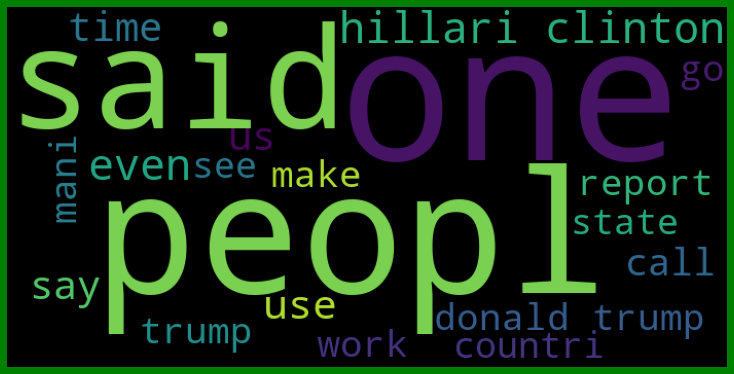

In [28]:
#Getting repeated words in label 1
from wordcloud import WordCloud
fake = df['news'][df['label']==1]
fake_cloud = WordCloud(width=700,height=350,background_color='black',max_words=20).generate(' '.join(fake))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

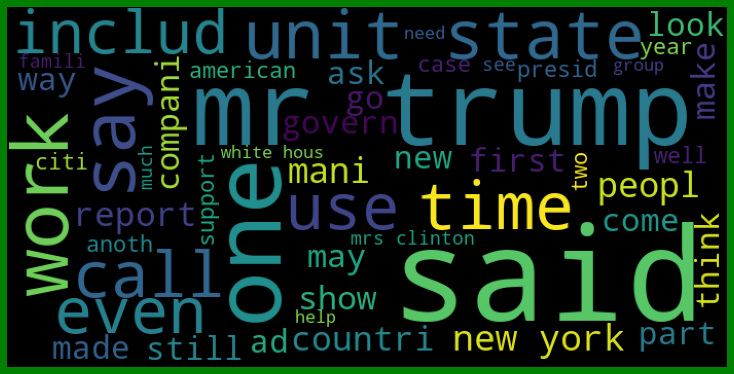

In [29]:
#Getting repeated words in label 0 
notfake = df['news'][df['label']==0]
notfake_cloud = WordCloud(width=700,height=350,background_color='black',max_words=50).generate(' '.join(notfake))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(notfake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Feature Extraction

In [30]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
# Using TfidfVectorizer to deal the frequent words
tf_vec = TfidfVectorizer()

#Seperating into input and output variables
x = tf_vec.fit_transform(df['news'])
y = df['label']

In [31]:
tf_vec.get_feature_names()[:20]

['00',
 '000',
 '0000',
 '000035',
 '0001',
 '00012',
 '0002',
 '000202',
 '000205',
 '0002062',
 '000billion',
 '000c',
 '000k',
 '000km',
 '000lb',
 '000m',
 '000mg',
 '000s',
 '000th',
 '000â']

In [32]:
tf_vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# Training Classifiers

In [33]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
# Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Finding the best parameters

In [35]:
model_params = {
    
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params': {
            'alpha':np.arange(1,1.5,0.3),
            'fit_prior':['True','False']
        }   
    },
    
     'Logistic Regression' : {
        'model': LogisticRegression(),
        'params': {
            'penalty':['l1','l2','elasticnet'],
            'C': np.arange(0,1,0.2)
        
        }
    }
}

In [36]:
# Making a list of scores and appending the parameters to it after hyperparameter tuning
scores = []
from sklearn.model_selection import GridSearchCV,cross_val_score
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [37]:
# Making a dataframe best which contains model,best_score & best_params
best= pd.DataFrame(scores,columns=['model','best_score','best_params'])
# Viewing the dataframe
best

,model,best_score,best_params
0,MultinomialNB,0.756248,"{'alpha': 1.0, 'fit_prior': 'True'}"
1,Logistic Regression,0.948865,"{'C': 0.8, 'penalty': 'l2'}"


In [47]:
parampac = {'C': np.arange(0,1,0.2),'n_iter_no_change':np.arange(1,5,1)}
clf = GridSearchCV(PassiveAggressiveClassifier(), parampac, cv=5)
clf.fit(x, y)
print(clf.best_params_)

{'C': 0.8, 'n_iter_no_change': 1}


In [48]:
# Passing the best fit parameters obtained after hyperparameter tuning using GridSearchCV
mnb = MultinomialNB(alpha = 1.0,fit_prior = True)
lr = LogisticRegression(C = 0.8, penalty = 'l2')
pac = PassiveAggressiveClassifier(C = 0.8, n_iter_no_change = 1)
rfc = RandomForestClassifier(n_estimators = 100,min_samples_split = 2)

In [49]:
# Evaluating the models using to find their performance metrics
def evaluate_metrics(model):
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred=model.predict(x_test)
    print('Accuracy score of',model,'is:')
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [50]:
evaluate_metrics(lr)

Accuracy score of LogisticRegression(C=0.8) is:
0.9510527754990429
[[2017   80]
 [  99 1461]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2097
           1       0.95      0.94      0.94      1560

    accuracy                           0.95      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



In [51]:
evaluate_metrics(mnb)

Accuracy score of MultinomialNB() is:
0.762373530216024
[[2095    2]
 [ 867  693]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2097
           1       1.00      0.44      0.61      1560

    accuracy                           0.76      3657
   macro avg       0.85      0.72      0.72      3657
weighted avg       0.83      0.76      0.74      3657



In [52]:
evaluate_metrics(pac)

Accuracy score of PassiveAggressiveClassifier(C=0.8, n_iter_no_change=1) is:
0.9603500136724091
[[2020   77]
 [  68 1492]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2097
           1       0.95      0.96      0.95      1560

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



In [53]:
evaluate_metrics(rfc)

Accuracy score of RandomForestClassifier() is:
0.905386929176921
[[2056   41]
 [ 305 1255]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2097
           1       0.97      0.80      0.88      1560

    accuracy                           0.91      3657
   macro avg       0.92      0.89      0.90      3657
weighted avg       0.91      0.91      0.90      3657



In [54]:
pac.fit(x_train,y_train)
pac.score(x_train,y_train)
predpac=pac.predict(x_test)
print('Accuracy score of',pac,'is:')
print(accuracy_score(y_test,predpac))
print(confusion_matrix(y_test,predpac))
print(classification_report(y_test,predpac))

Accuracy score of PassiveAggressiveClassifier(C=0.8, n_iter_no_change=1) is:
0.9592562209461307
[[2018   79]
 [  70 1490]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2097
           1       0.95      0.96      0.95      1560

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



In [55]:
# Extracting true_positives, false_positives, true_negatives, false_negatives seperately
tn, fp, fn, tp = confusion_matrix(y_test, predpac).ravel()
print("True Positives: ",tp)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)

True Positives:  1490
True Negatives:  2018
False Positives:  79
False Negatives:  70


## Observations from Confusion Matrix
###### 1490 predicted not fake and its true
###### 2018 predicted fake and it is true
###### 79 predicted not fake and its false
###### 70 predicted fake  and its false 

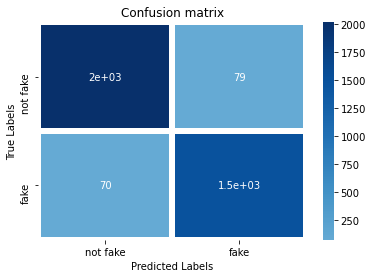

In [56]:
# Checking the performance metrics of PassiveAggressiveClassifier model in detail by visualizing Confusion matrix
conf_mat=confusion_matrix(y_test,predpac)
ax=plt.subplot()
sns.heatmap(conf_mat,cmap='Blues',annot=True,ax=ax,linewidths=5,linecolor='w',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not fake','fake'])
ax.yaxis.set_ticklabels(['not fake','fake'])
plt.show()

###### Conclusion: From all the above classifier models Passive Aggressive Classifier shows good performance metrics. So,we choose it as the best model and save it in a pickle file. 

In [58]:
print(x_test, predpac)

  (0, 337)	0.16840978952830304
  (0, 741)	0.07254423273362837
  (0, 1327)	0.043127386718164434
  (0, 1337)	0.070336902042405
  (0, 2650)	0.10585947139077309
  (0, 2773)	0.17851729083712398
  (0, 2878)	0.200255090643906
  (0, 4308)	0.04232036235622858
  (0, 5541)	0.06338702784483713
  (0, 6085)	0.09685534151871471
  (0, 6086)	0.1510872414865666
  (0, 6087)	0.10724857484097457
  (0, 6816)	0.09454846996618226
  (0, 8989)	0.04508695857551443
  (0, 9182)	0.127264715502467
  (0, 13940)	0.1146180113254921
  (0, 16064)	0.262591399785776
  (0, 16081)	0.19223231551240266
  (0, 22073)	0.1710895887473992
  (0, 22102)	0.038308647049289324
  (0, 23967)	0.06166128570535529
  (0, 28535)	0.05705119617725681
  (0, 29254)	0.044320782491710994
  (0, 30890)	0.07220467279520715
  (0, 31033)	0.06100756184609699
  :	:
  (3656, 107834)	0.06685962126666892
  (3656, 108004)	0.0199605079178422
  (3656, 109133)	0.07177535532460781
  (3656, 109156)	0.06194388720873001
  (3656, 110078)	0.08985989836149907
  (3656, 1

In [59]:
feature_names = tf_vec.get_feature_names()

In [60]:
# Most real news
sorted(zip(pac.coef_[0], feature_names), reverse=True)[:20]

[(8.810120176882396, 'anti'),
 (8.006829788459633, 'octob'),
 (7.05478793318838, '2016'),
 (6.807069195272478, 'non'),
 (6.743743470638119, 'co'),
 (6.0867330010274046, 'self'),
 (5.990014007933851, 'novemb'),
 (4.870085527970645, 'hillari'),
 (4.657206630516245, 'snip'),
 (4.481706279089966, 'comment'),
 (4.4545780920363045, 'howev'),
 (4.418369863313869, 'via'),
 (4.2403899299196866, 'sourc'),
 (3.9601867689870813, 'print'),
 (3.956196689473238, 'old'),
 (3.892950965907711, 'us'),
 (3.8670932965425022, 'share'),
 (3.710231408048328, 'al'),
 (3.707463968139503, 'com'),
 (3.5828254681647707, 'elect')]

In [61]:
# Most fake news
sorted(zip(pac.coef_[0], feature_names))[:20]

[(-9.134286369657586, 'breitbart'),
 (-7.73400600342936, 'twitter'),
 (-6.970339999023812, 'said'),
 (-6.312446105988179, '2017'),
 (-6.022788461181964, 'ms'),
 (-5.215782528103516, 'mr'),
 (-4.495395297113844, 'mrs'),
 (-4.361850526926442, 'follow'),
 (-3.4007617271337875, 'jeff'),
 (-2.96807003021551, 'presid'),
 (-2.9267245548044714, 'administr'),
 (-2.913596456054012, 'milo'),
 (-2.8777985940204984, 'dr'),
 (-2.8161902397587033, 'march'),
 (-2.7999127650429965, 'democrat'),
 (-2.7638117638142985, 'pamkeynen'),
 (-2.7616976963276736, 'sunday'),
 (-2.7592299114113925, 'last'),
 (-2.695080609484012, 'mondal'),
 (-2.6741888714716695, 'report')]

# Testing Predictions

In [66]:
all_predictions = pac.predict(x_test)
all_predictions

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [81]:
df_test = {'predictions':all_predictions}
df_test = pd.DataFrame(df_test)
df_test

,predictions
0,0
1,1
2,0
3,1
4,1
...,...
3652,0
3653,0
3654,1
3655,1


In [82]:
# Storing the predictions to a csv file
df_test.to_csv('Fake_News_Test_Predictions.csv')

In [83]:
# Testing the News is Fake/Not Fake
prediction1 = pac.predict(x_test[1])

if(prediction1[0]==0):
    print('The News is Fake')
else:
    print('The News is Not Fake')

The News is Not Fake


In [84]:
# Testing the News is Fake/Not Fake
prediction2 = pac.predict(x_test[2])

if(prediction2[0]==0):
    print('The News is Fake')
else:
    print('The News is Not Fake')

The News is Fake


### Saving the best model in a pickle file

In [85]:
#importing joblib
import joblib
#saving the model in a pickle file
joblib.dump(pac,'Fake_News_Detection_Project.pkl')

['Fake_News_Detection_Project.pkl']